In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Cosmo.micro_lensing import einstein_radius
from calc_ellipticity import ellipticity,ellipticity_image_mock
from astropy import units as u

In [5]:
# deltaPix = 0.03
deltaPix = 0.03
psf = 0.07

## standard ellipticity and light curve

In [6]:
d_s = 8000
d_l = 4000              # pc
M0 = 500               # M_sol
theta_E = einstein_radius(M0, d_l, d_s)     # arcsec
velocity = 400*u.km/u.s          # km/s
d_lu = d_l*u.pc
tE = (theta_E*u.arcsec/(velocity/d_lu*u.rad)).to(u.day)

print(f't_E = {tE}')

t_E = 390.6852684655684 d


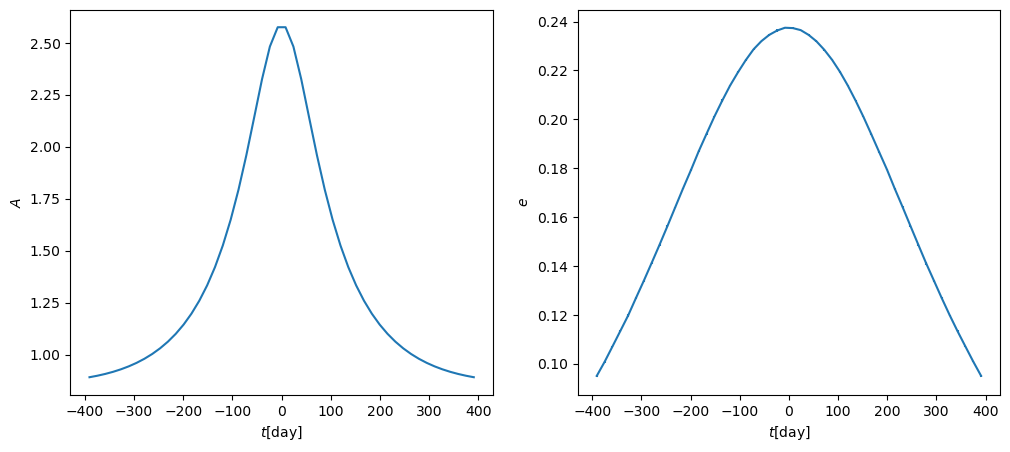

In [8]:
t = np.linspace(-tE.value, tE.value, 50)
b = theta_E*0.2                                 # let's assume the nearest position is 0.5 theta_E
beta = np.sqrt(b**2 + (t*u.day*velocity/d_lu*u.rad).to(u.arcsec).value**2) / theta_E

Amp = (beta*beta+1)/(beta*np.sqrt(beta*beta + 4))
ellip, err_ellip = ellipticity(deltaPix, psf, beta, theta_E=theta_E, use_galsim=True)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

ax = axes[0]
ax.plot(t, Amp)
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$A$')

ax = axes[1]
# ax.plot(t, ellip)
ax.errorbar(t, ellip, err_ellip)
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$e$')

plt.show()

<ErrorbarContainer object of 3 artists>

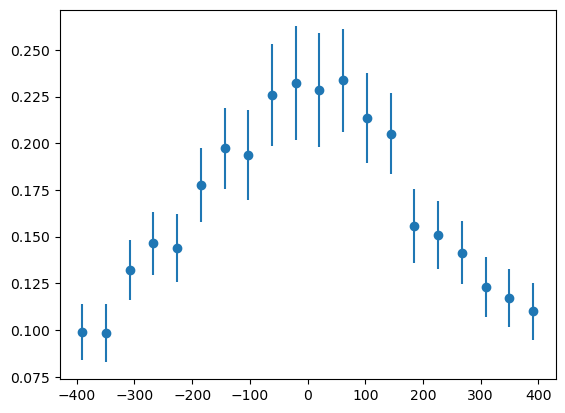

In [11]:
t_obs = np.linspace(-tE.value, tE.value, 20)
b = theta_E*0.2                                 # let's assume the nearest position is 0.5 theta_E
x = (t_obs*u.day*velocity/d_lu*u.rad).to(u.arcsec).value
e_obs = np.zeros_like(t_obs)
err_obs = np.zeros_like(t_obs)
ims = []
for i in range(len(t_obs)):
    res = ellipticity_image_mock(deltaPix, psf, 0, 0, x[i], b, theta_E, 100, True, True, 100, 1)
    e_obs[i] = res['e']
    err_obs[i] = res['e_err']
    ims.append(res['image'])
plt.errorbar(t_obs, e_obs, err_obs, fmt='o')

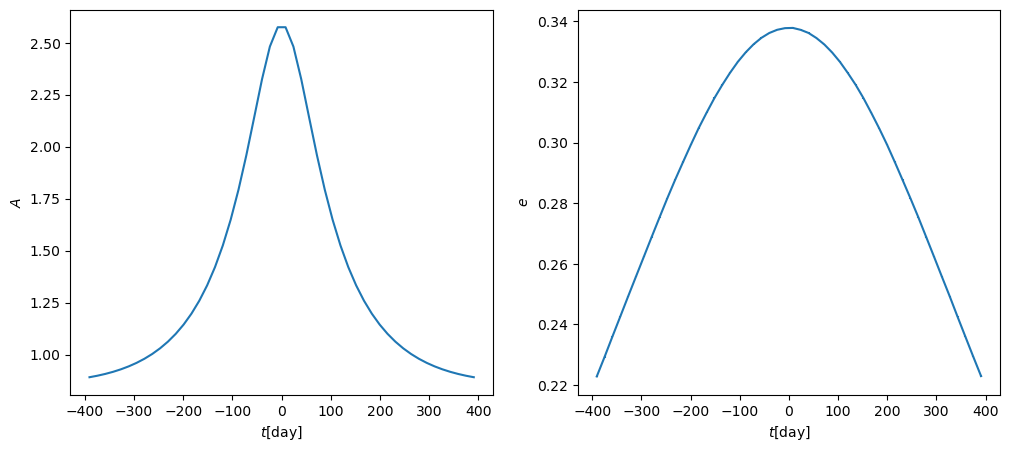

In [96]:
t = np.linspace(-tE.value, tE.value, 50)
b = theta_E*0.2                                 # let's assume the nearest position is 0.5 theta_E
beta = np.sqrt(b**2 + (t*u.day*velocity/d_lu*u.rad).to(u.arcsec).value**2) / theta_E

Amp = (beta*beta+1)/(beta*np.sqrt(beta*beta + 4))
ellip, err_ellip = ellipticity(deltaPix, psf, beta, theta_E=theta_E, use_galsim=False, add_noise=False, snr=50, sky_level=1)


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

ax = axes[0]
ax.plot(t, Amp)
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$A$')

ax = axes[1]
ax.errorbar(t, ellip, err_ellip)
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$e$')

plt.show()

## d_l, beta relation

In [4]:
d_s = 8000
d_l = np.linspace(2000, 6000, 30)
M_0 = 1e3
beta = np.linspace(0.1, 1.0, 60)

beta_2, d_l_2 = np.meshgrid(beta, d_l)

In [8]:
result = ellipticity(deltaPix, psf, beta_2, d_l_2, d_s, M_0, use_galsim=False, verbose=True)

100%|██████████| 1800/1800 [00:51<00:00, 35.01it/s]


Text(0, 0.5, '$d_l[\\mathrm{pc}]$')

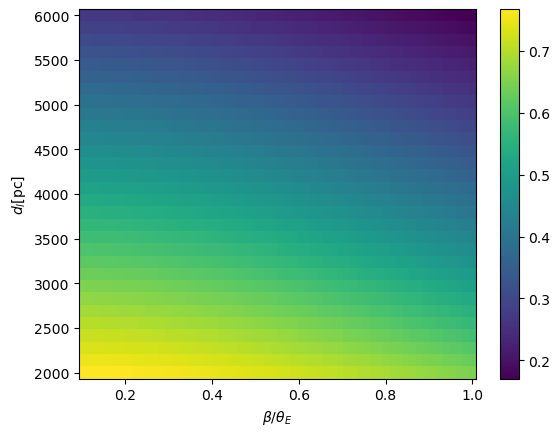

In [9]:
plt.pcolormesh(beta_2, d_l_2, result[0])
plt.colorbar()
plt.xlabel('$\\beta/\\theta_E$')
plt.ylabel('$d_l[\\mathrm{pc}]$')

In [25]:
theta_E = einstein_radius(M_0, d_l, d_s)

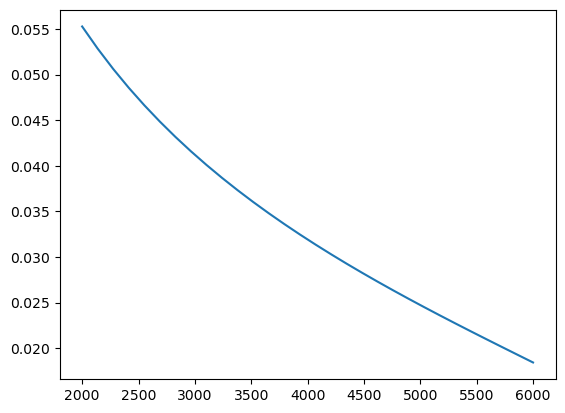

In [26]:
plt.plot(d_l, theta_E)

## curves of different M_h

Any of the $e-M_h(\text{or } d_l)$ relation can be interpreted as $e-\theta_E$ relation.
$$
\theta_E \propto M_h \frac{D_{ls}}{D_lD_s}\\
R_E \propto M_h \frac{D_{ls} D_l}{D_s}
$$
We can assume the peak value of Amplification is static, and the unknown is mainly velocity, mass, lens distance.

In [10]:
d_s = 8000
d_l = 4000                            # pc
M0 = np.linspace(50, 500, 10)         # M_sol
Amps = []
ellips = []
for m in M0:
    theta_E = einstein_radius(m, d_l, d_s)     # arcsec
    b = theta_E*0.5                             # We fix b/theta_E, so that the peak amplification is the same
    beta = np.sqrt(b**2 + (t*u.day*velocity/d_lu*u.rad).to(u.arcsec).value**2) / theta_E
    Amp = (beta*beta+1)/(beta*np.sqrt(beta*beta + 4))
    ellip, err_ellip = ellipticity(deltaPix, psf, beta, theta_E=theta_E)
    Amps.append(Amp)
    ellips.append(ellip)

In [16]:
d_s = 8000
d_l = 4000                            # pc
diff_velocity = np.linspace(200, 800, 10)
Amps_2 = []
ellips_2 = []
m = 250
for v in diff_velocity:
    theta_E = einstein_radius(m, d_l, d_s)     # arcsec
    b = theta_E*0.5                             # We fix b/theta_E, so that the peak amplification is the same
    beta = np.sqrt(b**2 + (t*u.day*v*u.km/u.s/d_lu*u.rad).to(u.arcsec).value**2) / theta_E
    Amp = (beta*beta+1)/(beta*np.sqrt(beta*beta + 4))
    ellip, err_ellip = ellipticity(deltaPix, psf, beta, theta_E=theta_E)
    Amps_2.append(Amp)
    ellips_2.append(ellip)

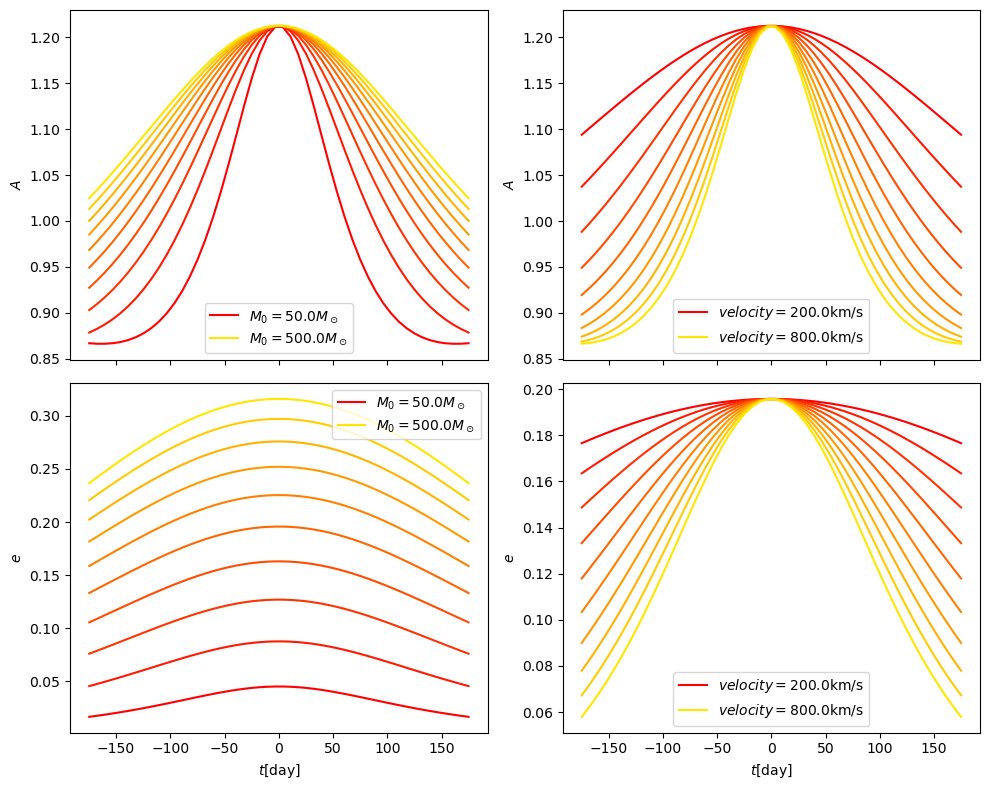

In [22]:
ht = lambda ls: [ls[0], ls[-1]]
cmap = plt.get_cmap('autumn')
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 8))

ax = axes[0,0]
for i in range(len(Amps)):
    ax.plot(t, Amps[i], label=f'$M_0={M0[i]} M_\\odot$', color=cmap(i/len(Amps)))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=ht(handles), labels=ht(labels))
# ax.set_xlabel('$t$[day]')
ax.set_ylabel('$A$')

ax = axes[0,1]
for i in range(len(Amps_2)):
    ax.plot(t, Amps_2[i], label=f'$velocity={diff_velocity[i]} \\mathrm{{km/s}}$', color=cmap(i/len(Amps_2)))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=ht(handles), labels=ht(labels))
# ax.set_xlabel('$t$[day]')
ax.set_ylabel('$A$')

ax = axes[1,0]
for i in range(len(ellips)):
    ax.plot(t, ellips[i], label=f'$M_0={M0[i]} M_\\odot$', color=cmap(i/len(ellips)))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=ht(handles), labels=ht(labels))
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$e$')

ax = axes[1,1]
for i in range(len(ellips_2)):
    ax.plot(t, ellips_2[i], label=f'$velocity={diff_velocity[i]} \\mathrm{{km/s}}$', color=cmap(i/len(ellips_2)))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=ht(handles), labels=ht(labels))
ax.set_xlabel('$t$[day]')
ax.set_ylabel('$e$')

plt.tight_layout()


plt.show()

## Examine the e, theta_E, beta relation

In [6]:
d_s = 8000
d_l = 4000              # pc
d_lu = d_l*u.pc
M0 = 500               # M_sol
theta_E0 = einstein_radius(M0, d_l, d_s)    # arcsec
# Base theta_E

beta0 = np.linspace(0.1, 1, 40)
theta_E = theta_E0*np.linspace(0.5, 1.5, 30)

beta_2, theta_E_2 = np.meshgrid(beta0, theta_E)

In [7]:
result = ellipticity(deltaPix, psf, beta=beta_2, theta_E=theta_E_2, use_galsim=False, verbose=True)

100%|██████████| 1200/1200 [00:33<00:00, 35.64it/s]


In [9]:
Amp = (beta0*beta0+1)/(beta0*np.sqrt(beta0*beta0 + 4))

In [17]:
plt.Axes.images

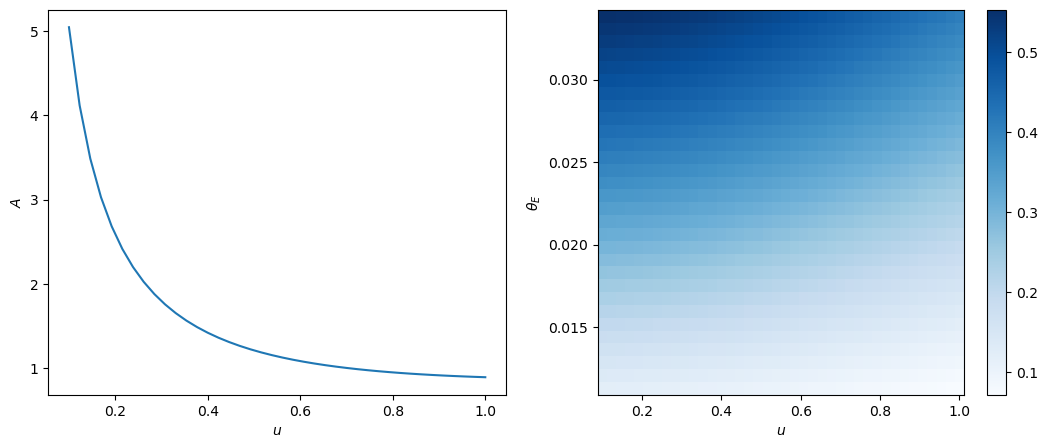

In [20]:
cmap = 'Blues'
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax_l, ax_r = ax
ax_l.plot(beta0, Amp)
ax_l.set_xlabel('$u$')
ax_l.set_ylabel('$A$')
im = ax_r.pcolormesh(beta_2, theta_E_2, result[0], cmap=cmap)
ax_r.set_xlabel('$u$')
ax_r.set_ylabel('$\\theta_E$')
plt.colorbar(mappable=im, ax=ax_r)
plt.show()